#**Laboratorio 7: integración y derivación - Melanie Andrea Muñoz Chavarria**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy

##**Parte 1**
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

####**Data Frame**

In [2]:
#Puntos
t=np.array([1.00,1.01,1.02,1.03,1.04])
i=np.array([3.10,3.12,3.14,3.18,3.24])

In [3]:
#Data Frama
data={'Tiempo [s]':t,'Corriente [A]':i}
df=pd.DataFrame(data) #Para pasardel diccionario al data
df

,Tiempo [s],Corriente [A]
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


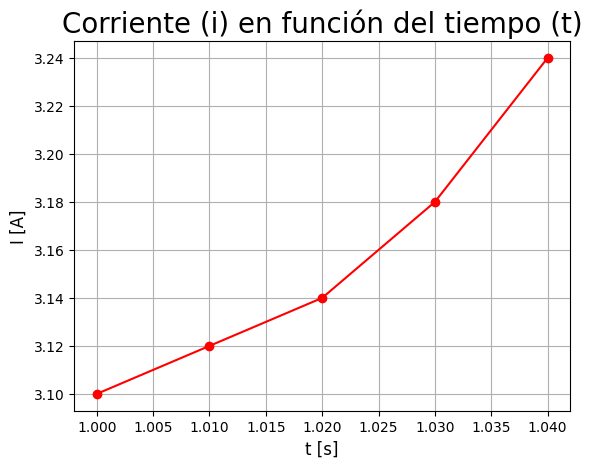

In [4]:
#Gráfico de los datos del data Frame
plt.figure()
plt.plot(df['Tiempo [s]'],df['Corriente [A]'], '.r-',markersize=12)
plt.title('Corriente (i) en función del tiempo (t)',fontsize=20)
plt.xlabel('t [s]',fontsize=12)
plt.ylabel('I [A]', fontsize=12)

plt.grid()

####**Derivadas númericas con pendientes**

In [5]:
#Pendientes/Derivadas  #Falta por polinomio de lagrange eeeee
m=np.diff(i)/np.diff(t)

In [6]:
#Para obtener cuatro puntos se toman los promedios de los valores, con vectorización
i_promedios=(i[0:4]+i[1:])/2
print(i_promedios)

t_promedios=(t[0:4]+t[1:])/2
print(t_promedios)


[3.11 3.13 3.16 3.21]
[1.005 1.015 1.025 1.035]


In [7]:
#Fem
R=0.142 #ohms
L=0.98 #herios
fem=L*m+R*i_promedios

In [8]:
#Data frame con cambios
data1={'Tiempo [seg]':t_promedios,'Corriente [A]':i_promedios, 'Derivada númerica [V]': m, 'Fem [V]':fem}
df1=pd.DataFrame(data1)
df1

,Tiempo [seg],Corriente [A],Derivada númerica [V],Fem [V]
0,1.005,3.11,2.0,2.40162
1,1.015,3.13,2.0,2.40446
2,1.025,3.16,4.0,4.36872
3,1.035,3.21,6.0,6.33582


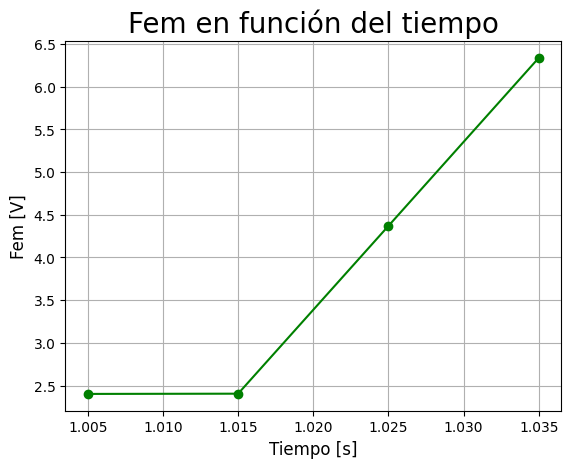

In [9]:
#Grafico de la Fem en función del tiempo
plt.figure()
plt.plot(df1['Tiempo [seg]'],df1['Fem [V]'],'.g-',markersize=12)
plt.title('Fem en función del tiempo', fontsize=20)
plt.ylabel('Fem [V]', fontsize=12)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.grid()

####**Derivadas númericas con la interpolación**

In [10]:
#Interpolación
p_c=sc.interpolate.CubicSpline(t,i)

#Derivada de la interpolación

derivadas_p_c=sc.misc.derivative(p_c,t)

#Fem
fem_interpolacion=L*derivadas_p_c+R*i

#Data frame con los datos de la iterpolación
#Data frame con cambios
data2={'Tiempo 1 [seg]':t,'Corriente 1 [A]':i, 'Derivada númerica [V]': derivadas_p_c, 'Fem 1 [V]':fem_interpolacion}
df2=pd.DataFrame(data2)
df2

<ipython-input-10-39ea7e0dbcff>:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas_p_c=sc.misc.derivative(p_c,t)


,Tiempo 1 [seg],Corriente 1 [A],Derivada númerica [V],Fem 1 [V]
0,1.00,3.10,1816.5200,1780.62980
1,1.01,3.12,1742.5025,1708.09549
2,1.02,3.14,1669.5000,1636.55588
3,1.03,3.18,1597.4975,1565.99911
4,1.04,3.24,1526.4800,1496.41048


##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

####**Código Markdown para la integral por regla del trapecio**
1. Ingresar la función f para la cual, se desea integrar.
2. Ingresar los intervalos de integración a y b. Y la n cantidad de puntos que tendrá la variable independiente.
3. Crear un vector x que inicie en a, finalice en b y tenga n puntos.
4. Utilizando la definición de la integral por trapecios:
$$
\int_{a}^{b} f(x) \, dx = \frac{h}{2} \left( f(a) + f(b) + 2 \sum_{i=1}^{n-1} f(x_i) \right)
$$

- crear c=0 y h=(b-a)/n

- Repetir para i en x:

    c= c+ f(i)

5. Sea $$integral=\frac{h}{2} (f(a)+f(b)+2c)$$

6. Retornar integral.

####**Código Markdown para la integral por regla de Simpson compuesta**

1. Ingresar f(x), la función para la cual se desee calcular la integral.
2. Ingresar a y b, los lí,ites de integración, superior e inferior respectivamente.
4. Ingresar la cantidad de puntos, n en la variable independiente.
3. Crear un vector x con n datos, desde a, hasta b.
4. Dada la formula:
$\int_{a}^{b} f(x) dx = \frac {h}{3} [f(a)+2 \sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j}) + f(b)]$
 4.1 Crear un vector x_pares con todos los valores pares hasta n-2 del vector x.

 4.2 Crear un vector x_impares que con todos los valores imapares hasta n-1.

 4.3 Crear la variable c, que almacene la suma de las evaluaciones de f en cada elemento de x_pares. Y crear variable d, que alamcene la suma de cada evaluación de f en x impares.

5. $integral= \frac{h}{3}(f(a)+f(b)+4c+2d)$
6. Retornar integral
---





4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  



---


 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$


---




In [11]:
#Resolviendo la integral primero con sympy
x_=sy.Symbol('x')
f_1=1/(sy.tan(x_))**(1/2)
integral_f_1=sy.integrate(f_1, (x_, 0, sy.pi/2))


print(f'El resultado de la integral es: {integral_f_1}')

El resultado de la integral es: Integral(tan(x)**(-0.5), (x, 0, pi/2))


In [12]:
#Definiendo el error deseado
E=1e-5

####**Regla del trapecio**

Dada la formula: $$\int_{a}^{b} f(x) dx ≈ \frac {h}{2} [f(a)+ 2 \sum_{i=1}^{n-1} f(x_{i}) + f(b)] $$

Con $$h=\frac {b-a}{n}$$

con error:
$$E=-\frac{(b-a)^{3}}{12n^{2}} f''(\xi)$$

In [13]:
f1= lambda x: 1/np.sqrt(np.tan(x))

In [14]:
#Para garantizar el error que nos están pidiendo
#Tomando las derivadas con sympy
x_=sy.Symbol('x_')
f1_=1/(sy.tan(x_))**(1/2)
d1f1_=sy.diff(f1_,x_)
d2f1_=sy.diff(d1f1_,x_)
print(d2f1_)

(-1.5*tan(x_)**2 - 1.5)*(-0.5*tan(x_)**2 - 0.5)/tan(x_)**2.5 - 0.5*(2*tan(x_)**2 + 2)/tan(x_)**0.5


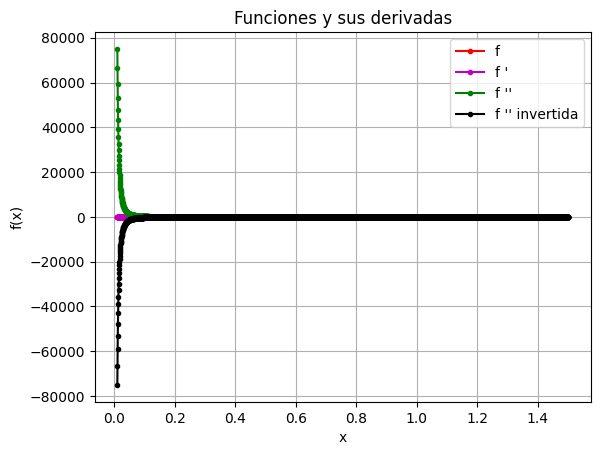

In [15]:
#Tomando las derivadas
d1f1=lambda x: ((-1/2)*(np.tan(x)**2)-(1/5))/(np.tan(x)**(3/2))
d2f1= lambda x: (-1.5*np.tan(x)**2 - 1.5)*(-0.5*np.tan(x)**2 - 0.5)/np.tan(x)**2.5 - 0.5*(2*np.tan(x)**2 + 2)/np.tan(x)**0.5
d2f1_invertida= lambda x: (-1)* (-1.5*np.tan(x)**2 - 1.5)*(-0.5*np.tan(x)**2 - 0.5)/np.tan(x)**2.5 - 0.5*(2*np.tan(x)**2 + 2)/np.tan(x)**0.5 #Para obtener el máximo de la función en [a,b]

#Puntos
a=0
b=np.pi/2

#Intervalo
x=np.linspace(0.01,b-0.07,3000)
plt.figure()
plt.plot(x,f1(x),'.r-', label="f")
plt.plot(x,d1f1(x),'.m-', label="f '")
plt.plot(x,d2f1(x),'.g-', label= "f ''")
plt.plot(x,d2f1_invertida(x), '.k-', label="f '' invertida")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funciones y sus derivadas')
plt.grid()
plt.legend()


In [16]:
#Obteniendo el máximo de la segunda derivada en el intervalo [a,b]
#maximo_trapecios=sc.optimize.fmin_powell(d2f1_invertida,0.2)
#maximo_trapecios

In [17]:
#El número de trapecios dado el error es:
#n_trapecios=np.sqrt(abs((((b-a)**3)/(12*E))*d2f1(maximo_trapecios[0])))
#n_trapecios

In [18]:
#Tomando la función definida

def integral_trap(f,a,b,N):
  x=np.linspace(a,b,int(N))
  h=(b-a)/N
  integral=(f(x[0])+f(x[-1])+2*f(x[1:-1]).sum())*0.5*h

  return integral

#Los resultados de la integral con él código creado

integralf1_trapecio=integral_trap(f1,0.01,b-0.07,30000)

#Redefiniendo el intervalo para scipy y utilizando la función de la misma librería
x=np.linspace(0.01,b-0.07,int(30000))
integralf1_trapecio_sc=sc.integrate.trapezoid(f1(x), x)

print(f'''El resultado de la integral con el código creado es {integralf1_trapecio} y con
scipy es {integralf1_trapecio_sc}. Entonces comparando el resultado de scipy con el
del código creado {integralf1_trapecio_sc/integralf1_trapecio}''')


El resultado de la integral con el código creado es 2.0090241034448164 y con
scipy es 2.009091073147254. Entonces comparando el resultado de scipy con el
del código creado 1.0000333344444812


####**Regla de Simpson Compuesta**

Con formula:
$$\int_{a}^{b} f(x) dx = \frac {h}{3} [f(a)+2 \sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j}) + f(b)]$$

Y error:$$E=-\frac{b-a}{180} {h}^{4} {f}^{(4)}(\xi) =-\frac{{(b-a)}^{5}}{2880 {n}^{4}} {f}^{(4)}(\xi)$$



In [19]:
#Cálculando el error
x_=sy.Symbol('x')
f1_=1/(sy.tan(x_))**(1/2)
d1f1_=sy.diff(f1_,x_)
d2f1_=sy.diff(d1f1_,x_)
d3f1_=sy.diff(d2f1_,x_)
d4f1_=sy.diff(d3f1_,x_)
print(d4f1_)

(-3.5*tan(x)**2 - 3.5)*(-2.5*tan(x)**2 - 2.5)*(-1.5*tan(x)**2 - 1.5)*(-0.5*tan(x)**2 - 0.5)/tan(x)**4.5 - 0.5*(-2.5*tan(x)**2 - 2.5)*(-1.5*tan(x)**2 - 1.5)*(2*tan(x)**2 + 2)/tan(x)**2.5 - 1.5*(-2.5*tan(x)**2 - 2.5)*(-0.5*tan(x)**2 - 0.5)*(2*tan(x)**2 + 2)/tan(x)**2.5 - 4.5*(-1.5*tan(x)**2 - 1.5)*(-0.5*tan(x)**2 - 0.5)*(2*tan(x)**2 + 2)/tan(x)**2.5 - 1.0*(-1.5*tan(x)**2 - 1.5)*(2*tan(x)**2 + 2)/tan(x)**0.5 - 0.5*2.25*(-tan(x)**2 - 1)**2*(2*tan(x)**2 + 2)/tan(x)**2.5 - 4.0*(-0.5*tan(x)**2 - 0.5)*(2*tan(x)**2 + 2)/tan(x)**0.5 - 1.0*(0.5*tan(x)**2 + 0.5)*(2*tan(x)**2 + 2)/tan(x)**0.5 + 1.75*(2*tan(x)**2 + 2)**2/tan(x)**0.5 - 2.0*(2*tan(x)**2 + 2)*tan(x)**1.5


In [20]:
#Ahora tomando las cuartas derivadas
d4f1=sy.lambdify(x_, d4f1_, 'numpy')
d4f1_inversa=lambda x: (-1)*d4f1(x)

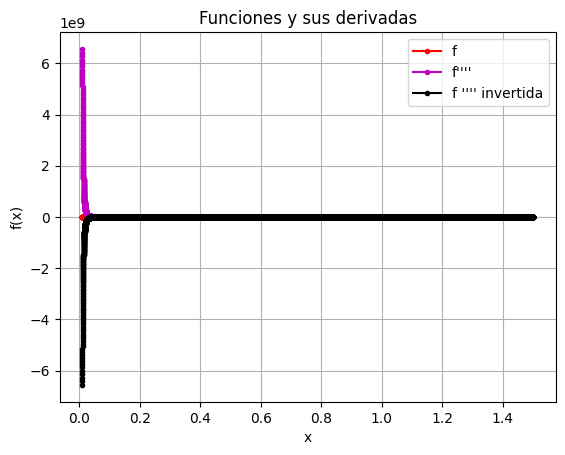

In [21]:
#Analizando las gráficos de las funciones de las derivadas
plt.figure()
plt.plot(x,f1(x),'.r-', label="f")
plt.plot(x,d4f1(x),'.m-', label="f''''")
plt.plot(x,d4f1_inversa(x), '.k-', label="f '''' invertida")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funciones y sus derivadas')
plt.grid()
plt.legend()

In [22]:
#Calculando el máximo
#maximo_simpson=sc.optimize.fmin_powell(d4f1_inversa,np.pi/2)
#maximo_simpson

In [23]:
#Tomando la función definida
def regla_simpson_compuesta(f,a,b,N):
  x5=np.linspace(a,b,int(N))

  h=x5[1]-x5[0]

  xj2=x5[2:int(N-2):2]
  xj2_1=x5[1:int(N-1):2]

  integral=(f(a)+f(b)+2*(f(xj2).sum())+4*(f(xj2_1).sum()))*(h/3)
  return integral

#Resultado de la integral
integralf1_simpson=regla_simpson_compuesta(f1,0.01,b-0.07,int(30000))

#Resultado con scipy
x=np.linspace(0.01,b-0.07,int(30000))
integralf1_simpson_sc=sc.integrate.simpson(f1(x), x)

print(f'''El resultado de la integral con el código creado es {integralf1_simpson} y con
scipy es {integralf1_simpson_sc}. Entonces comparando el resultado de scipy con el
del código creado {integralf1_simpson_sc/integralf1_simpson}''')


El resultado de la integral con el código creado es 2.0090778079493865 y con
scipy es 2.0090909706342575. Entonces comparando el resultado de scipy con el
del código creado 1.000006551605328


---
$$\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx $$


---

Considere el cambio de variable:

$$x= tan(\phi)$$,diferenciando $$dx={sec(\phi)}^{2} d\phi$$

Cuando $x$ tiende a $∞$, $\phi$ tiende a $\pi/2$. Y cuando $x$ tiende a $-∞$, $\phi$ tiende a $-\pi/2$

Entonces:
$$\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx =\int_{-\pi/2}^{\pi/2} \frac{{sec(\phi)}^{2}}{1 + {tan(\phi)}^{2}}\, d\phi $$

Por identidades trigonométricas $1 + {tan(\phi)}^{2}={sec(\phi)}^{2}$. Por lo tanto:
$$\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx =\int_{-\pi/2}^{\pi/2}\, d\phi $$






In [24]:
#Resolviendo la integral, primero con Simpy
f_2=1/(1+x_**2)
integral_f_2=sy.integrate(f_2, (x_, -sy.oo, sy.oo))
print(f'El resultado de la integral es: {integral_f_2}')

El resultado de la integral es: pi


In [25]:
f2=lambda x: 1 * x**0

####**Regla de Trapecio**

In [26]:
d2f2=lambda x: 0 * x**0 #Es constante, entonces la integral converge al valor, incluso para n, muy pequeñas

#Puntos
a1=-np.pi/2
b1=np.pi/2

#Resultados de la integrales
integralf2_trapecio=integral_trap(f2,a1,b1,300)


#Redefiniendo el intervalo para scipy y utilizando la función de la misma librería
x1=np.linspace(a1,b1,300)
integralf2_trapecio_sc=sc.integrate.trapezoid(f2(x1),x1)

print(f'''El resultado de la integral con el código creado es {integralf2_trapecio} y con
scipy es {integralf2_trapecio_sc}. Entonces comparando el resultado de scipy con el
del código creado {integralf2_trapecio_sc/integralf2_trapecio}''')


El resultado de la integral con el código creado es 3.131120678077827 y con
scipy es 3.141592653589793. Entonces comparando el resultado de scipy con el
del código creado 1.0033444816053512


####**Regla Simpson compuesta**

In [27]:
#Resultados de la integrales
integralf2_simpson=regla_simpson_compuesta(f2,a1,b1,300)


#Resultado con Scipy
x1=np.linspace(a1,b1,300)
integralf2_simpson_sc=sc.integrate.simpson(f2(x1),x1)

print(f'''El resultado de la integral con el código creado es {integralf2_simpson} y con
scipy es {integralf2_simpson_sc}. Entonces comparando el resultado de scipy con el
del código creado {integralf2_simpson_sc/integralf2_simpson}''')

El resultado de la integral con el código creado es 3.1310856547483645 y con
scipy es 3.141592653589793. Entonces comparando el resultado de scipy con el
del código creado 1.0033557046979837




---
$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


---

1. Se crea un intervalo de x en el cual se evaluará la función y el intervalo $[sin(x),cos(x)]$. Además de definir la función.
2. Se integra la función iterando sobre cada valor de n, en el intervalo definido anteriormente. Y se almacenan los valores en un vector.
3. Luego, el vector creado en el paso anterior se integra con respecto a la última integración ente $[0, \pi/4]$.

In [28]:
x_=np.linspace(0,np.pi/4,3000)

f_doble=lambda x,y: 2*y*np.sin(x)+(np.cos(x)**2)

In [29]:
#Integral doble
integrales_y=np.zeros(len(x_))

for i, n_ in enumerate(x_):
  y_intervalo=np.linspace(np.sin(n_),np.cos(n_),3000) #Intervalo de y
  integral=sc.integrate.simpson(f_doble(n_,y_intervalo),y_intervalo) #Evaluando cada integral
  integrales_y[i]=integral

integrales_y

array([1.00000000e+00, 9.99999897e-01, 9.99999588e-01, ...,
       1.11109084e-03, 5.55545517e-04, 1.11022302e-16])

In [30]:

integral_doble=sc.integrate.simpson(integrales_y,x_) #Hcer por los otros métodos
integral_doble

0.5118446353109152

5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [31]:
#Datos

b=0.5 #Longitud [m]
g=9.8 #gravedad [m/s²]
I_0=83.33e-6 #[kg m²] momento de inercia , idelaizado para una barilla generalizar
m=0.1 #[kg] masa


P_0=2*np.pi*np.sqrt((I_0/(m*g*b)))

In [32]:
#Valores de theta para k
theta_0=np.linspace(np.deg2rad(0.1),np.deg2rad(45),100)

In [33]:
#Función de período oscilación
def periodo_oscilacion(theta_0, phi):
  k=np.sin(theta_0/2)

  P_1=(2*P_0)/np.pi

  p_func= P_1*(1/(np.sqrt(1-(k**2)*(np.sin(phi))**2)))

  return p_func

In [34]:
#Utilizando el método integrate.trapezoid
phi=np.linspace(0,np.pi/2,10000)

integral_trapezoid=np.zeros(len(theta_0))
for i,n_ in enumerate(theta_0):
  a=sc.integrate.trapezoid(periodo_oscilacion(n_,phi), phi)
  integral_trapezoid[i]=a

integral_trapezoid

array([0.08193748, 0.08193794, 0.08193905, 0.08194079, 0.08194318,
       0.08194621, 0.08194988, 0.0819542 , 0.08195915, 0.08196475,
       0.081971  , 0.08197788, 0.08198541, 0.08199358, 0.0820024 ,
       0.08201186, 0.08202197, 0.08203272, 0.08204412, 0.08205616,
       0.08206885, 0.08208219, 0.08209618, 0.08211081, 0.0821261 ,
       0.08214203, 0.08215862, 0.08217585, 0.08219374, 0.08221228,
       0.08223148, 0.08225133, 0.08227183, 0.08229299, 0.08231481,
       0.08233729, 0.08236042, 0.08238422, 0.08240868, 0.0824338 ,
       0.08245958, 0.08248603, 0.08251314, 0.08254092, 0.08256937,
       0.08259848, 0.08262827, 0.08265873, 0.08268986, 0.08272167,
       0.08275415, 0.08278731, 0.08282115, 0.08285567, 0.08289088,
       0.08292676, 0.08296334, 0.08300059, 0.08303854, 0.08307718,
       0.08311651, 0.08315653, 0.08319725, 0.08323867, 0.08328078,
       0.0833236 , 0.08336712, 0.08341134, 0.08345628, 0.08350192,
       0.08354827, 0.08359534, 0.08364312, 0.08369162, 0.08374

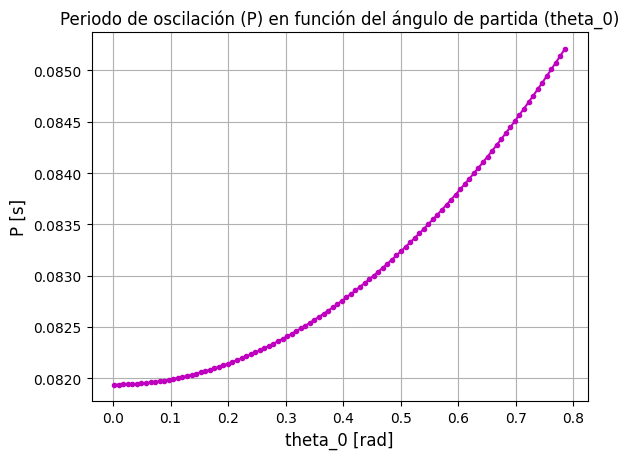

In [35]:
#Gráfico perido de oscilación en función theta
plt.figure()
plt.plot(theta_0,integral_trapezoid,'.m-')
plt.title('Periodo de oscilación (P) en función del ángulo de partida (theta_0)', fontsize=12)
plt.xlabel('theta_0 [rad]', fontsize=12)
plt.ylabel('P [s]', fontsize=12)
plt.grid()

In [36]:
#Utilizando el método integrate.quad

integral_integrate_quad=np.zeros(len(theta_0))
errores_integral=np.zeros(len(theta_0))
for i,n_ in enumerate(theta_0):
  b=sc.integrate.quad(periodo_oscilacion, 0,np.pi/2, args=(n_,))
  integral_integrate_quad[i]=b[0]
  errores_integral[i]=b[1]

print(integral_integrate_quad)
print(errores_integral)

[0.08193749 0.08193816 0.08193976 0.0819423  0.08194577 0.08195017
 0.08195551 0.08196177 0.08196897 0.0819771  0.08198615 0.08199614
 0.08200705 0.08201889 0.08203166 0.08204536 0.08205997 0.08207552
 0.08209198 0.08210937 0.08212767 0.08214689 0.08216703 0.08218809
 0.08221006 0.08223294 0.08225673 0.08228142 0.08230703 0.08233353
 0.08236094 0.08238925 0.08241845 0.08244855 0.08247954 0.08251142
 0.08254419 0.08257783 0.08261236 0.08264777 0.08268405 0.0827212
 0.08275921 0.0827981  0.08283784 0.08287843 0.08291988 0.08296218
 0.08300532 0.0830493  0.08309412 0.08313976 0.08318624 0.08323353
 0.08328164 0.08333056 0.08338028 0.08343081 0.08348213 0.08353424
 0.08358713 0.0836408  0.08369524 0.08375044 0.0838064  0.08386311
 0.08392056 0.08397875 0.08403767 0.08409731 0.08415766 0.08421872
 0.08428048 0.08434292 0.08440605 0.08446984 0.0845343  0.08459941
 0.08466517 0.08473156 0.08479857 0.0848662  0.08493443 0.08500325
 0.08507265 0.08514262 0.08521316 0.08528424 0.08535585 0.08542

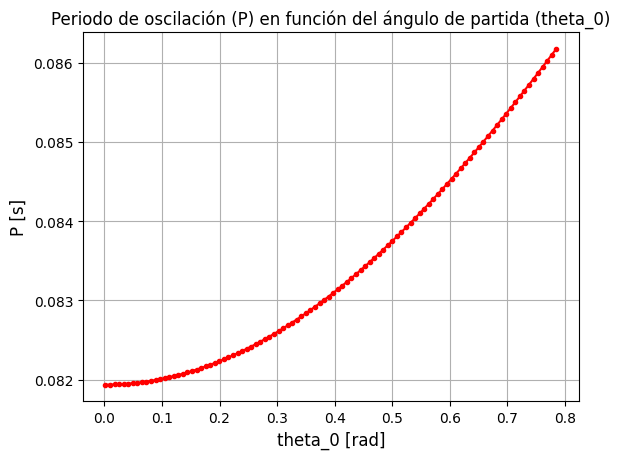

In [37]:
#Gráfico perido de oscilación en función theta
plt.figure()
plt.plot(theta_0,integral_integrate_quad,'.r-')
plt.title('Periodo de oscilación (P) en función del ángulo de partida (theta_0)', fontsize=12)
plt.xlabel('theta_0 [rad]',fontsize=12)
plt.ylabel('P [s]',fontsize=12)
plt.grid()